In [1]:
import GPy
import numpy as np

# Example training data (could represent known mine locations and safe spots)
np.random.seed(42)  # For reproducibility
X = np.random.uniform(0, 10, (10, 2))  # Random 2D coordinates on a 10x10 grid
Y = np.random.randint(0, 2, (10, 1)) * 3 - 1.5  # Randomly -1.5 or 1.5 as target values

# Kernel setup
kernel = GPy.kern.RBF(input_dim=2, variance=1.0, lengthscale=2.0)

# Create GP model
model = GPy.models.GPRegression(X, Y, kernel)

# Optimize the model
model.optimize()


In [2]:
# Defining a fine grid for the game board
x = np.linspace(0, 10, 10)
y = np.linspace(0, 10, 10)
X_grid, Y_grid = np.meshgrid(x, y)
game_grid = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T


In [3]:
# Predict mean and variance on the game grid
_, variances = model.predict(game_grid)


In [4]:
# Threshold for considering a cell as containing a mine
variance_threshold = variances.mean()  # A simple threshold based on average variance

# Game board setup
board = (variances > variance_threshold).reshape(X_grid.shape)


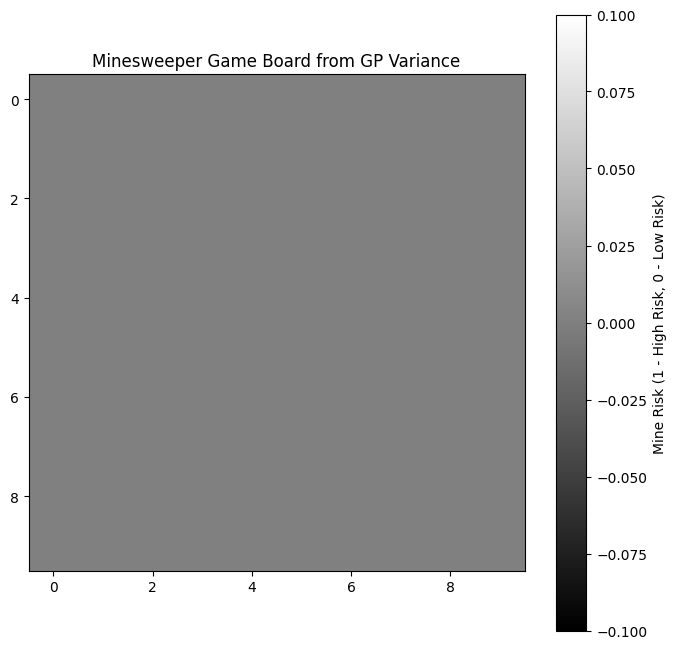

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(board, cmap='gray', interpolation='none')
plt.colorbar(label='Mine Risk (1 - High Risk, 0 - Low Risk)')
plt.title('Minesweeper Game Board from GP Variance')
plt.grid(False)
plt.show()


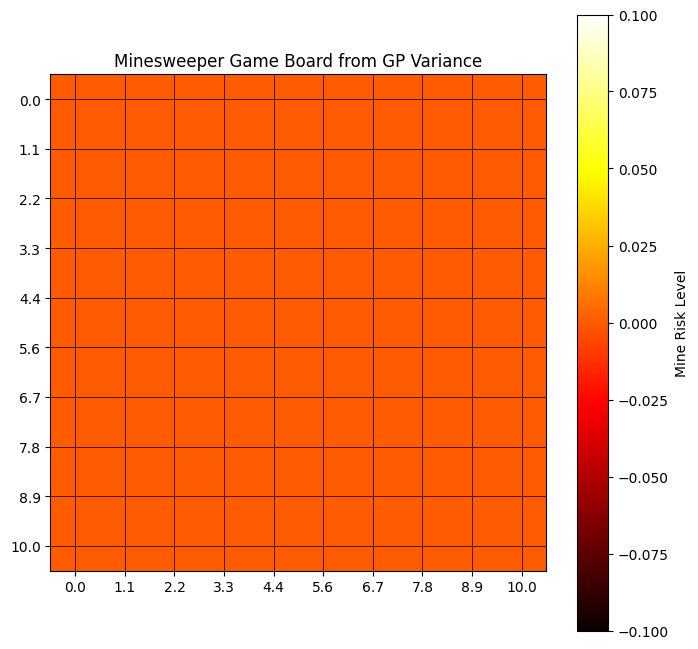

In [6]:
import numpy as np
import GPy
import matplotlib.pyplot as plt

# Initialize the random seed
np.random.seed(42)

# Example training data
X = np.random.uniform(0, 10, (10, 2))  # 2D coordinates
Y = np.random.randint(0, 2, (10, 1)) * 3 - 1.5  # Targets are -1.5 or 1.5

# Create a GP model with an RBF kernel
kernel = GPy.kern.RBF(input_dim=2, variance=1.0, lengthscale=2.0)
model = GPy.models.GPRegression(X, Y, kernel)
model.optimize()

# Define a grid for the Minesweeper game
x = np.linspace(0, 10, 10)
y = np.linspace(0, 10, 10)
X_grid, Y_grid = np.meshgrid(x, y)
game_grid = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T

# Predict mean and variance on the game grid
_, variances = model.predict(game_grid)

# Setting a threshold based on the distribution of variance
variance_threshold = np.percentile(variances, 75)  # Top 25% high variance considered as high risk

# Determine high risk areas
high_risk_areas = variances.reshape(X_grid.shape) > variance_threshold

# Plotting the game board
plt.figure(figsize=(8, 8))
plt.imshow(high_risk_areas, cmap='hot', interpolation='none')
plt.colorbar(label='Mine Risk Level')
plt.title('Minesweeper Game Board from GP Variance')
plt.xticks(ticks=np.arange(len(x)), labels=[f"{xi:.1f}" for xi in x])
plt.yticks(ticks=np.arange(len(y)), labels=[f"{yi:.1f}" for yi in y])
plt.grid(True, which='both', color='k', linewidth=0.5)
plt.show()


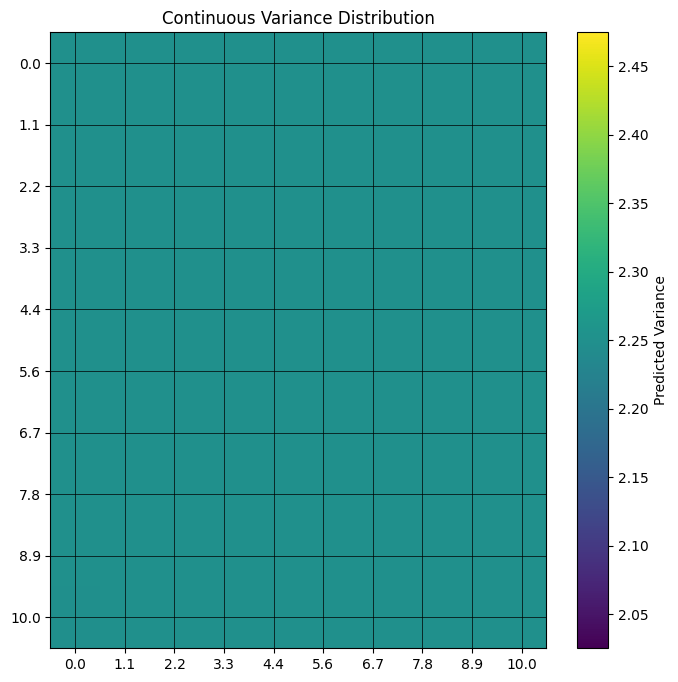

In [7]:
import numpy as np
import GPy
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generating example training data
X = np.random.uniform(0, 10, (10, 2))  # 2D coordinates on a 10x10 grid
Y = np.random.randint(0, 2, (10, 1)) * 3 - 1.5  # Randomly -1.5 or 1.5 as target values

# Create and train the GP model
kernel = GPy.kern.RBF(input_dim=2, variance=1.0, lengthscale=2.0)
model = GPy.models.GPRegression(X, Y, kernel)
model.optimize()

# Define the game grid
x = np.linspace(0, 10, 10)
y = np.linspace(0, 10, 10)
X_grid, Y_grid = np.meshgrid(x, y)
game_grid = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T

# Predict mean and variance on the grid
_, variances = model.predict(game_grid)

# Plot the variance distribution directly
plt.figure(figsize=(8, 8))
plt.imshow(variances.reshape(X_grid.shape), cmap='viridis', interpolation='none', aspect='auto')
plt.colorbar(label='Predicted Variance')
plt.title('Continuous Variance Distribution')
plt.xticks(ticks=np.arange(len(x)), labels=[f"{xi:.1f}" for xi in x])
plt.yticks(ticks=np.arange(len(y)), labels=[f"{yi:.1f}" for yi in y])
plt.grid(True, which='both', linestyle='-', color='k', linewidth=0.5)
plt.show()


Variance values: [1.13347818 1.11622525 1.09591935 ... 1.09617005 1.09690412 1.10150149]


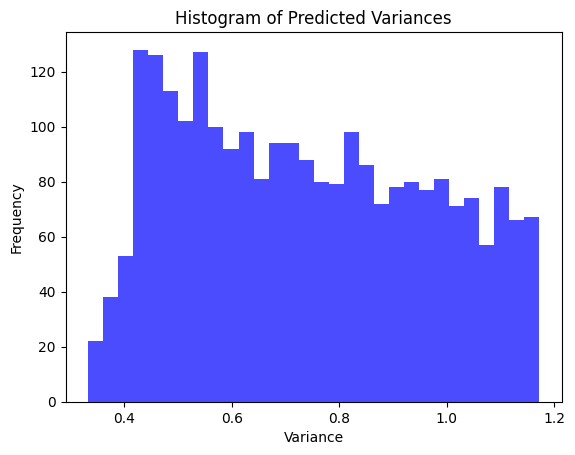

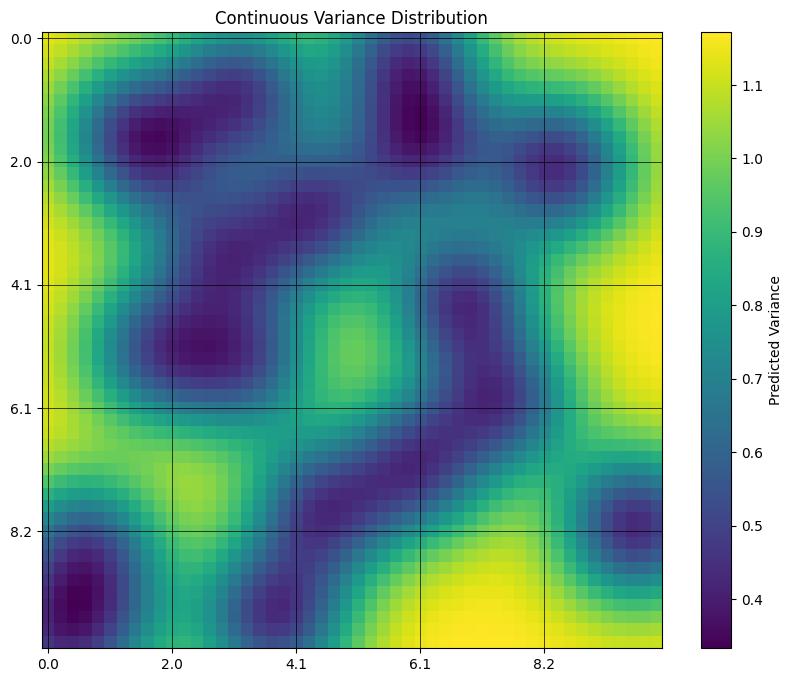

In [8]:
import numpy as np
import GPy
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generating more diverse example training data
X = np.random.uniform(0, 10, (20, 2))  # 2D coordinates on a 10x10 grid
Y = np.sin(X[:, 0]) + np.cos(X[:, 1]) + np.random.normal(0, 0.5, X.shape[0])  # More complex function

# Create and train the GP model
kernel = GPy.kern.RBF(input_dim=2, variance=1.0, lengthscale=1.0)
model = GPy.models.GPRegression(X, Y[:, None], kernel)
model.optimize()

# Define the game grid
x = np.linspace(0, 10, 50)
y = np.linspace(0, 10, 50)
X_grid, Y_grid = np.meshgrid(x, y)
game_grid = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T

# Predict mean and variance on the grid
_, variances = model.predict(game_grid)

# Check the variance distribution
print("Variance values:", variances.flatten())
plt.figure()
plt.hist(variances.flatten(), bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Predicted Variances')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

# Plot the variance distribution directly
plt.figure(figsize=(10, 8))
plt.imshow(variances.reshape(X_grid.shape), cmap='viridis', interpolation='none', aspect='auto')
plt.colorbar(label='Predicted Variance')
plt.title('Continuous Variance Distribution')
plt.xticks(ticks=np.arange(0, 50, 10), labels=[f"{xi:.1f}" for xi in x[::10]])
plt.yticks(ticks=np.arange(0, 50, 10), labels=[f"{yi:.1f}" for yi in y[::10]])
plt.grid(True, which='both', linestyle='-', color='k', linewidth=0.5)
plt.show()
